### Figure 1a Bonus Energy vs MCC

Number of sequences with start MCC lower than 0.5 25 out of 50
Number of sequences with start MCC higher than 0.5 23 out of 50


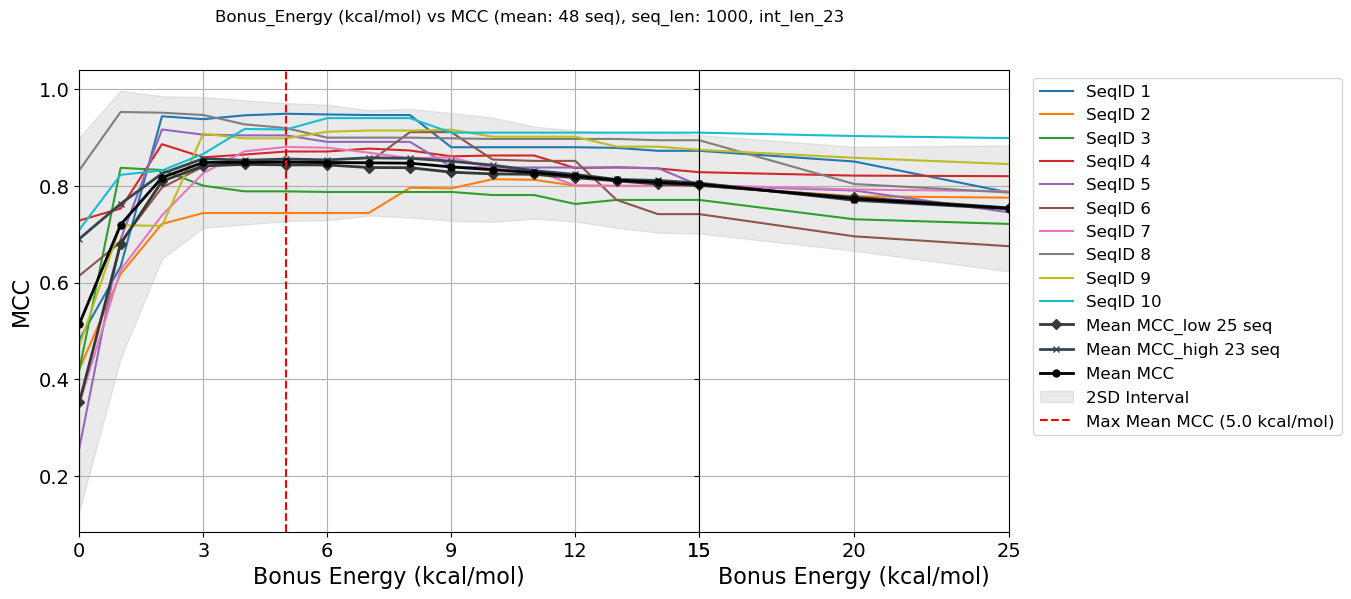

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "./data_for_vis/1a_BonusEnergyMCC/50seq_1000len_be_mcc_intlen_23.tsv"
data = pd.read_csv(file_path, sep="\t")

# Convert Bonus_Energy to kcal/mol
data['Bonus_Energy_kcal'] = data['Bonus_Energy'] / 100

grouped = data.groupby('Bonus_Energy')['MCC']
mean_mcc = grouped.mean().reset_index()
std_mcc = grouped.std().reset_index()

mean_mcc['Bonus_Energy_kcal'] = mean_mcc['Bonus_Energy'] / 100
mean_mcc['Lower'] = mean_mcc['MCC'] - 2 * std_mcc['MCC']
mean_mcc['Upper'] = mean_mcc['MCC'] + 2 * std_mcc['MCC']
mean_mcc['Upper'] = mean_mcc['Upper'].clip(upper=1)

# Identify initial MCC values at Bonus_Energy = 0
initial_mcc = data[data['Bonus_Energy'] == 0][['SeqID', 'MCC']]
low_mcc_group = initial_mcc[initial_mcc['MCC'] < 0.5]['SeqID']
high_mcc_group = initial_mcc[initial_mcc['MCC'] >= 0.5]['SeqID']
print(f'Number of sequences with start MCC lower than 0.5 {len(low_mcc_group)} out of 50')
print(f'Number of sequences with start MCC higher than 0.5 {len(high_mcc_group)} out of 50')

data_low = data[data['SeqID'].isin(low_mcc_group)]
data_high = data[data['SeqID'].isin(high_mcc_group)]

grouped_low = data_low.groupby('Bonus_Energy')['MCC']
mean_mcc_low = grouped_low.mean().reset_index()
mean_mcc_low['Bonus_Energy_kcal'] = mean_mcc_low['Bonus_Energy'] / 100

grouped_high = data_high.groupby('Bonus_Energy')['MCC']
mean_mcc_high = grouped_high.mean().reset_index()
mean_mcc_high['Bonus_Energy_kcal'] = mean_mcc_high['Bonus_Energy'] / 100

# Find the Bonus_Energy at which MCC is maximum
max_mcc_row = mean_mcc.loc[mean_mcc['MCC'].idxmax()]
max_bonus_energy_kcal = max_mcc_row['Bonus_Energy_kcal']
max_mcc_value = max_mcc_row['MCC']

seqid_to_plot = data['SeqID'].unique()[:10]
data_to_plot = data[data['SeqID'].isin(seqid_to_plot)]

# Create the figure and subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot each SeqID
for seq_id in seqid_to_plot:
    subset = data_to_plot[data_to_plot['SeqID'] == seq_id]
    subset_kcal = subset.copy()
    subset_kcal['Bonus_Energy_kcal'] = subset_kcal['Bonus_Energy'] / 100
    ax1.plot(subset_kcal['Bonus_Energy_kcal'], subset_kcal['MCC'], label=f"SeqID {seq_id}")
    ax2.plot(subset_kcal['Bonus_Energy_kcal'], subset_kcal['MCC'], label=f"SeqID {seq_id}")

# Plot the mean MCC
ax1.plot(mean_mcc_low['Bonus_Energy_kcal'], mean_mcc_low['MCC'], marker='D', markersize=5, color='#353935', label=f'Mean MCC_low {len(low_mcc_group)} seq', linewidth=2)
ax2.plot(mean_mcc_low['Bonus_Energy_kcal'], mean_mcc_low['MCC'], marker='D', markersize=5, color='#353935', label=f'Mean MCC_low {len(low_mcc_group)} seq', linewidth=2)

ax1.plot(mean_mcc_high['Bonus_Energy_kcal'], mean_mcc_high['MCC'], marker='x', markersize=5, color='#36454F', label=f'Mean MCC_high {len(high_mcc_group)} seq', linewidth=2)
ax2.plot(mean_mcc_high['Bonus_Energy_kcal'], mean_mcc_high['MCC'], marker='x', markersize=5, color='#36454F', label=f'Mean MCC_high {len(high_mcc_group)} seq', linewidth=2)

ax1.plot(mean_mcc['Bonus_Energy_kcal'], mean_mcc['MCC'], marker='o', markersize=5, color='black', label='Mean MCC', linewidth=2)
ax2.plot(mean_mcc['Bonus_Energy_kcal'], mean_mcc['MCC'], marker='o', markersize=5, color='black', label='Mean MCC', linewidth=2)

# Add 2SD interval shading
ax1.fill_between(mean_mcc['Bonus_Energy_kcal'], mean_mcc['Lower'], mean_mcc['Upper'], color='gray', alpha=0.16, label='2SD Interval')
ax2.fill_between(mean_mcc['Bonus_Energy_kcal'], mean_mcc['Lower'], mean_mcc['Upper'], color='gray', alpha=0.16, label='2SD Interval')

# Add vertical lines for max MCC
ax1.axvline(x=max_bonus_energy_kcal, color='red', linestyle='--', label=f'Max Mean MCC ({max_bonus_energy_kcal:.1f} kcal/mol)')
ax2.axvline(x=max_bonus_energy_kcal, color='red', linestyle='--', label=f'Max Mean MCC ({max_bonus_energy_kcal:.1f} kcal/mol)')

# Customize axes
ax1.tick_params(labelsize=14)
ax1.set_xlim(0, 15)
ax1.set_xticks(range(0, 16, 3))
ax1.set_xlabel("Bonus Energy (kcal/mol)", fontsize=16)
ax1.grid(True)

ax2.tick_params(labelsize=14)
ax2.set_xlim(15, data['Bonus_Energy_kcal'].max())
ax2.set_xticks([round(x, 1) for x in range(15, int(data['Bonus_Energy_kcal'].max()) + 2, 5)])
ax2.set_xlabel("Bonus Energy (kcal/mol)", fontsize=16)
ax2.grid(True)

# Shared y-axis label
ax1.set_ylabel("MCC", fontsize=16)

# Title and legend
fig.suptitle(f"Bonus_Energy (kcal/mol) vs MCC (mean: {len(data['SeqID'].unique())} seq), seq_len: 1000, int_len_23")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Adjust layout
plt.subplots_adjust(wspace=0)


# Save and show
#plt.savefig("updated_fixed_be_mcc_data_seqlen_1000_intlen_23.svg", format="svg")
plt.show()


### Figure 1b Structure prediction of length 4000nt against be 0

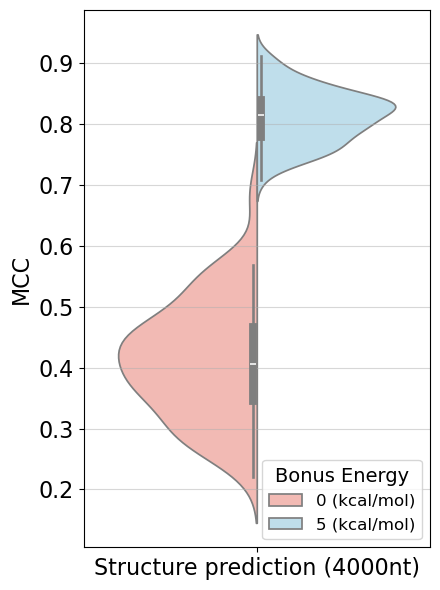

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
df_exp = pd.read_csv("./data_for_vis/1b_4000nt0BE/long_lenseq_4000_bonus_energy_intlen_23_combined.tsv", sep="\t")
df_base = pd.read_csv("./data_for_vis/1b_4000nt0BE/long_lenseq_4000_0be_intlen_23_combined.tsv", sep="\t")

# Rename conditions
df_exp["Condition"] = "5 (kcal/mol)"
df_base["Condition"] = "0 (kcal/mol)"

# Combine datasets
df_combined = pd.concat([df_base, df_exp], ignore_index=True)
df_combined["Group"] = "Structure prediction (4000nt)"  # single category on x-axis
#Sequence Length 4000/Interval Length 23/Number of Intervals 50
# Create split violin plot
plt.figure(figsize=(4.5, 6))
sns.violinplot(
    x="Group",
    y="MCC",
    hue="Condition",
    data=df_combined,
    split=True,
    palette={"0 (kcal/mol)": "#FCB2AA", "5 (kcal/mol)": "#B7E1F3"}
)

plt.title("", fontsize=16)
plt.xlabel("")
plt.ylabel("MCC", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', alpha=0.5)

# Place legend in bottom right
plt.legend(
    title="Bonus Energy",
    fontsize=12,
    title_fontsize=14,
    loc='lower right'
)

plt.tight_layout()
#plt.savefig("seqlen_4000_intlen_23_intnum_50_biviolin.svg", format="svg")
plt.show()


### Figure 2 MCC vs Coverage

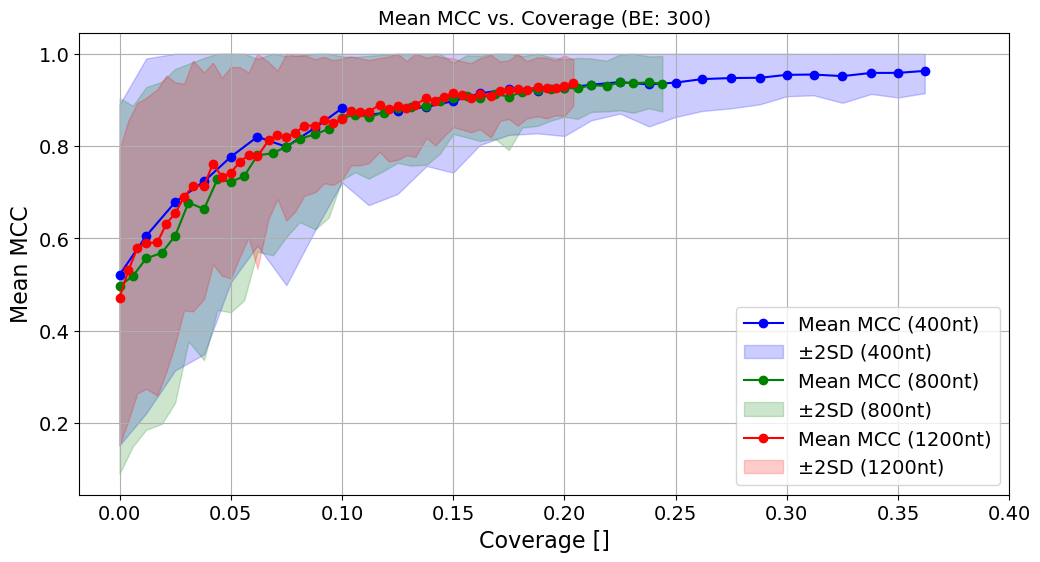

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths for different sequence lengths with the same bonus energy (500BE)
file_paths = {
    '400nt': './data_for_vis/2_MCCvsCoverage/50seq_400len_300be_res_finding_intervals.tsv',
    '800nt': './data_for_vis/2_MCCvsCoverage/50seq_800len_300be_res_finding_intervals.tsv',
    '1200nt': './data_for_vis/2_MCCvsCoverage/50seq_1200len_300be_res_finding_intervals.tsv'
}

# Define colors for different datasets
colors = {'400nt': 'blue', '800nt': 'green', '1200nt': 'red'}

plt.figure(figsize=(12, 6))

all_coverage_labels = []

for label, file_path in file_paths.items():
    # Load the data
    data = pd.read_csv(file_path, sep='\t')
    
    # Ensure required columns exist
    if 'Number of Intervals' not in data.columns or 'MCC' not in data.columns or 'SeqID' not in data.columns:
        raise ValueError(f"The expected columns 'Number of Intervals', 'MCC', and 'SeqID' are not in {file_path}.")
    
    # Extract sequence length from filename
    seq_len = int(file_path.split('_')[4].replace('len', ''))
    
    # Count unique sequences in the SeqID column
    num_sequences = data['SeqID'].nunique()
    
    # Group by intervals and calculate mean and standard deviation of MCC Score
    stats = data.groupby('Number of Intervals')['MCC'].agg(['mean', 'std']).reset_index()
    
    # Compute 2 standard deviations
    stats['2SD'] = 2 * stats['std']
    
    # Calculate upper and lower bounds and clip them
    stats['upper'] = np.clip(stats['mean'] + stats['2SD'], 0, 1)
    stats['lower'] = np.clip(stats['mean'] - stats['2SD'], 0, 1)
    
    # Compute sequence coverage
    stats['Coverage'] = (stats['Number of Intervals'] * 5) / seq_len
    
    # Plot the results against coverage
    plt.plot(stats['Coverage'].round(3), stats['mean'], marker='o', linestyle='-', label=f'Mean MCC ({label})', color=colors[label])
    plt.fill_between(stats['Coverage'].round(3), stats['lower'], stats['upper'], 
                     color=colors[label], alpha=0.2, label=f'±2SD ({label})')
    
    # Store coverage values for custom x-ticks
    all_coverage_labels.extend(list(zip(stats['Coverage'].round(3), stats['Coverage'].round(3))))

# Sort and create unique x-tick labels
all_coverage_labels = sorted(set(all_coverage_labels))
x_ticks, coverage_labels = zip(*all_coverage_labels)

# Set specific x-ticks at 0, 0.05, 0.1, ..., 0.4
x_ticks_filtered = np.arange(0, 0.45, 0.05)
plt.xticks(x_ticks_filtered, [f"{x:.2f}" for x in x_ticks_filtered], rotation=0, fontsize=14)
plt.yticks(fontsize=14)

plt.title(f'Mean MCC vs. Coverage (BE: 300)', fontsize=14)
plt.xlabel('Coverage []', fontsize=16)
plt.ylabel('Mean MCC', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True, which='both', axis='both')

plt.show()
# Save the plot to a file
# output_file = './interval_length/with_coverage/cov_aligned_50seq_allLen_300be_res_finding_intervals.svg'
# plt.savefig(output_file, format="svg")
# print(f"Plot saved as {output_file}")




### Figure 2 inert: MCC vs interval length

<Figure size 1200x600 with 0 Axes>

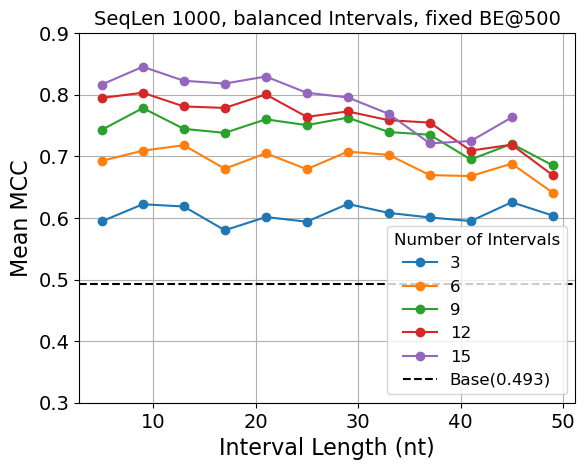

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary mapping different interval lengths to their corresponding input file paths
file_paths = {
    5: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_5_combined.tsv",
    9: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_9_combined.tsv",
    13: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_13_combined.tsv",
    17: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_17_combined.tsv",
    21: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_21_combined.tsv",
    25: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_25_combined.tsv",
    29: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_29_combined.tsv",
    33: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_33_combined.tsv",
    37: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_37_combined.tsv",
    41: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_41_combined.tsv",
    45: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_45_combined.tsv",
    49: "./data_for_vis/2_inset/double_fixed_lenseq_1000_balanced_bepernt_intlen_49_combined.tsv",
}


# Define the specific number of intervals we want to highlight in the plot
intervals_to_plot = [3, 6, 9, 12, 15]

# List to store aggregated data for all interval lengths
combined_data = []

# Loop over all interval lengths and their associated file paths
for interval_length, file_path in file_paths.items():
    # Read the TSV file into a DataFrame
    data = pd.read_csv(file_path, sep='\t')
    
    # Group by SeqID and Number of Intervals, and compute the mean MCC
    data_mean = data.groupby(['SeqID','Number of Intervals'])['MCC'].mean().reset_index()
    
    # Append the processed data along with the interval length into the combined list
    for row in data_mean.itertuples(index=False):
        combined_data.append([interval_length, row[1], row[2]])

# Create a DataFrame from the aggregated data
df = pd.DataFrame(combined_data, columns=['Interval_Length', 'Number_of_Intervals', 'MCC'])

# Filter to only include selected intervals of interest
df_filtered = df[df['Number_of_Intervals'].isin(intervals_to_plot)]

# Group by interval length and number of intervals and compute the mean MCC again
grouped = df_filtered.groupby(['Interval_Length','Number_of_Intervals'])['MCC'].mean().reset_index()

# Pivot the data for plotting: rows = interval length, columns = number of intervals
pivot_df = grouped.pivot(index='Interval_Length', columns='Number_of_Intervals', values='MCC')

# Optional: read a baseline MCC value from a reference file (commented out)
# baseline_df = pd.read_csv("/.../lenint_0.tsv", sep='\t')
# baseline_mcc_mean = baseline_df['MCC'].mean()

# Plotting section
plt.figure(figsize=(12, 6))

# Plot the MCC values for different number of intervals across interval lengths
pivot_df.plot(marker='o')

# Add a horizontal line to indicate a baseline MCC value
plt.axhline(y=0.493, linestyle='--', label=f'Base(0.493)', color="black")

# Add plot title and axis labels
plt.title('SeqLen 1000, balanced Intervals, fixed BE@500', fontsize=14)
plt.xlabel('Interval Length (nt)', fontsize=16)
plt.ylabel('Mean MCC', fontsize=16)

# Add grid for better readability
plt.grid(True, which='both', axis='both')

# Add legend to distinguish different number of intervals
plt.legend(fontsize=12, title='Number of Intervals', title_fontsize=12)

# Adjust font sizes and axis limits
plt.xticks(fontsize=14)
plt.ylim(0.3, 0.9)
plt.yticks(fontsize=14)

# Save the figure as an SVG file
# output_file = './finalfinal_interval_length_vs_mean_mcc_filtered.svg'
# plt.savefig(output_file, format="svg")

# Show the plot
plt.show()

# Print confirmation of saved file
# print(f"Plot saved as {output_file}")


### Supp. Fig A.1 for zero bonus energy mcc vs sequence length

/tmp/ipykernel_635768/3106812855.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='seq_length', y='MCC', data=data_combined, palette="muted", cut=0)


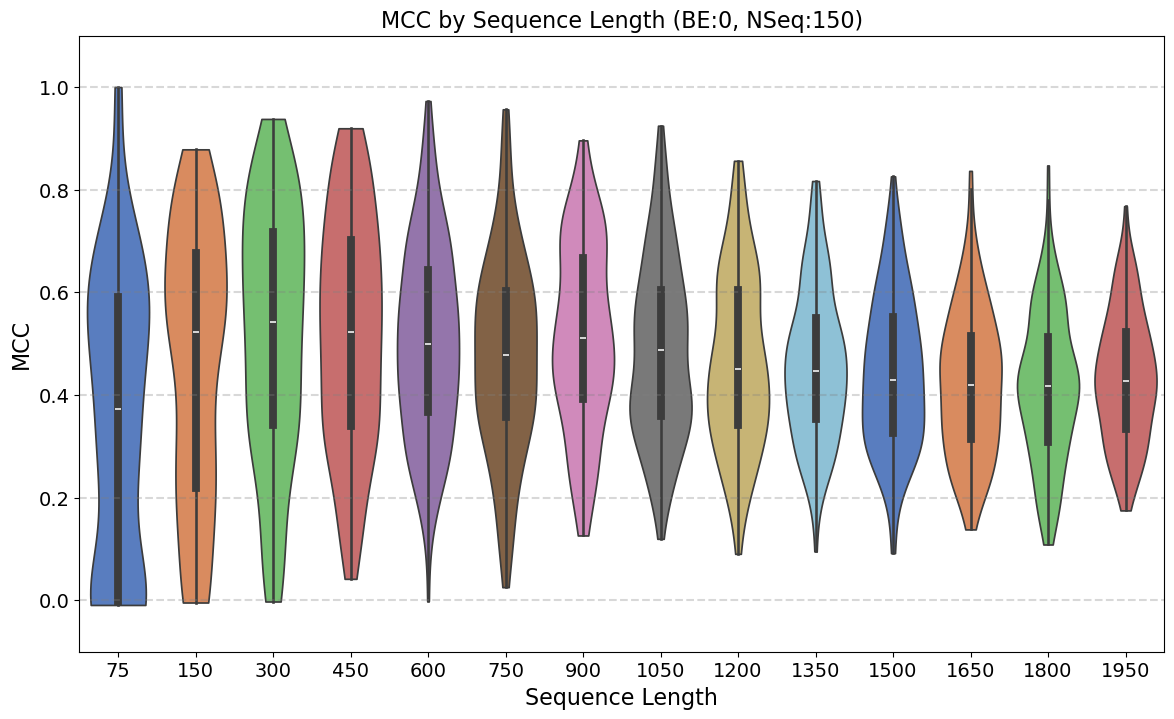

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Define the folder containing the TSV files
folder_path = "./data_for_vis/Supp_A1_ZeroBE/standard_par"  

file_paths = glob.glob(f"{folder_path}/*.tsv")

data_combined = pd.DataFrame()

# Read each TSV file and append data with an additional column for seq_length
for file_path in file_paths:
    seq_length = int(file_path.split('_')[-1].split('.')[0])
    
    data = pd.read_csv(file_path, sep="\t")
    data['seq_length'] = seq_length
    
    data_combined = pd.concat([data_combined, data], ignore_index=True)

# Verify the combined data
# print(data_combined.head())

# Create a violin plot with MCC on the y-axis and seq_length on the x-axis
plt.figure(figsize=(14, 8))
sns.violinplot(x='seq_length', y='MCC', data=data_combined, palette="muted", cut=0)

# Customize the plot
plt.title("MCC by Sequence Length (BE:0, NSeq:150)", fontsize=16)
plt.xlabel("Sequence Length", fontsize=16)
plt.ylabel("MCC", fontsize=16)
plt.ylim(-0.1, 1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add horizontal lines for major y-axis ticks
for y_tick in plt.gca().get_yticks():
    plt.axhline(y=y_tick, color='grey', linestyle='--', alpha=0.3)


# Save the plot
# plt.savefig("zero_be_normal_mcc_by_sequence_length.svg", format="svg")
# plt.savefig("zero_be_normal_mcc_by_sequence_length.pdf", format="pdf")


plt.show()



### Supp. Fig A.2: MCC by sequence length for normal, high, low diff parameters

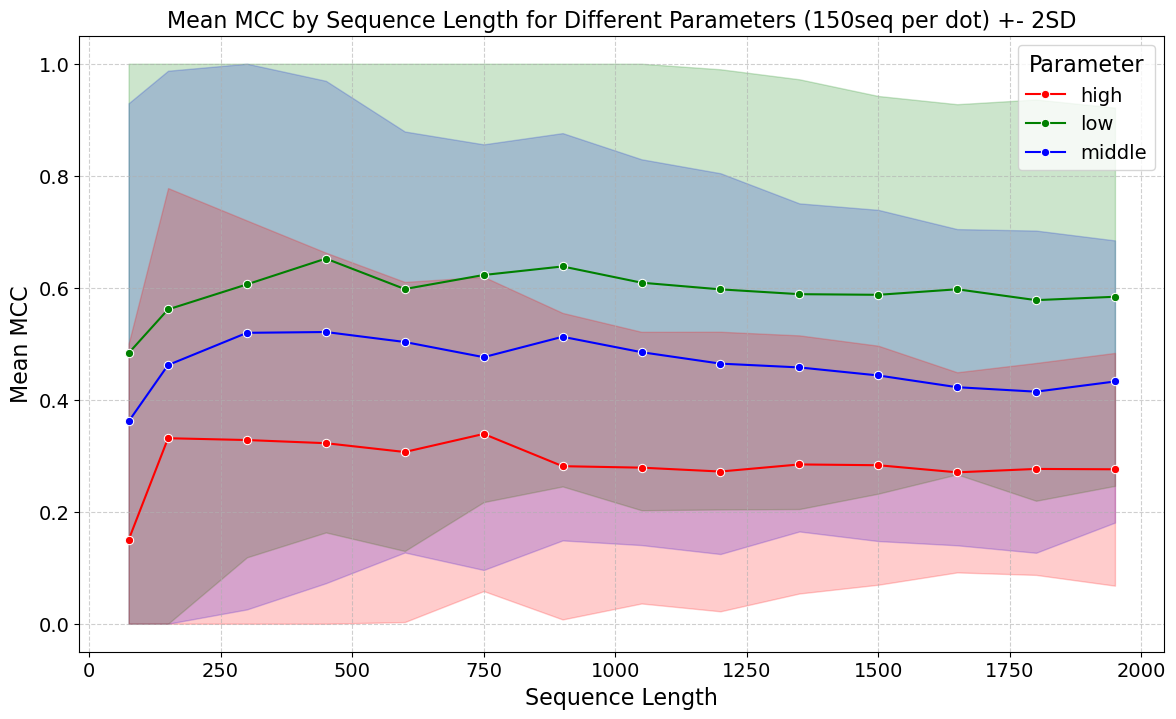

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

# Define the folders containing the TSV files
folders = {
    "normal": "./data_for_vis/Supp_A2_MCCbySeqLength/standard_par",
    "low_dif": "./data_for_vis/Supp_A2_MCCbySeqLength/lowdif_par",
    "high_dif": "./data_for_vis/Supp_A2_MCCbySeqLength/highdif_par"
}

data_combined = pd.DataFrame()

for param_type, folder_path in folders.items():
    file_paths = glob.glob(f"{folder_path}/*.tsv")
    
    for file_path in file_paths:
        seq_length = int(file_path.split('_')[-1].split('.')[0])
        
        data = pd.read_csv(file_path, sep="\t")
        data['seq_length'] = seq_length
        data['parameter'] = param_type
        
        data_combined = pd.concat([data_combined, data], ignore_index=True)

# Calculate mean and standard deviation of MCC for each sequence length and parameter type
stats_mcc = data_combined.groupby(['seq_length', 'parameter'])['MCC'].agg(['mean', 'std']).reset_index()

# Compute 2SD (95% confidence region) and clip values between 0 and 1
stats_mcc['lower'] = np.clip(stats_mcc['mean'] - 2 * stats_mcc['std'], 0, 1)
stats_mcc['upper'] = np.clip(stats_mcc['mean'] + 2 * stats_mcc['std'], 0, 1)

plt.figure(figsize=(14, 8))

# Rename parameter labels
label_map = {
    "normal": "middle",
    "low_dif": "low",
    "high_dif": "high"
}
stats_mcc['parameter'] = stats_mcc['parameter'].replace(label_map)
palette = {
    "middle": "blue",
    "low": "green",
    "high": "red"
}

# Plot mean MCC with lineplot
sns.lineplot(x='seq_length', y='mean', hue='parameter', data=stats_mcc, marker='o', palette=palette)

# Plot 2SD regions with lower alpha
for param_type in ["middle", "low", "high"]:
    subset = stats_mcc[stats_mcc['parameter'] == param_type]
    plt.fill_between(subset['seq_length'], subset['lower'], subset['upper'], 
                     color=palette[param_type], alpha=0.2)

# Customize the plot
plt.title("Mean MCC by Sequence Length for Different Parameters (150seq per dot) +- 2SD", fontsize=16)
plt.xlabel("Sequence Length", fontsize=16)
plt.ylabel("Mean MCC", fontsize=16)
plt.legend(title="Parameter", fontsize=14, title_fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the plot
# plt.savefig("zero_be_mcc_by_sequence_length_2SD.svg", format="svg")
# plt.savefig("/home/mescalin/skibinski/WORKING/Interactome/final_figures/final_zero_be_mcc_by_sequence_length_2SD.pdf", format="pdf")


plt.show()


### Supp Fig. B.4: MCC vs Number of itnervals for different interval length

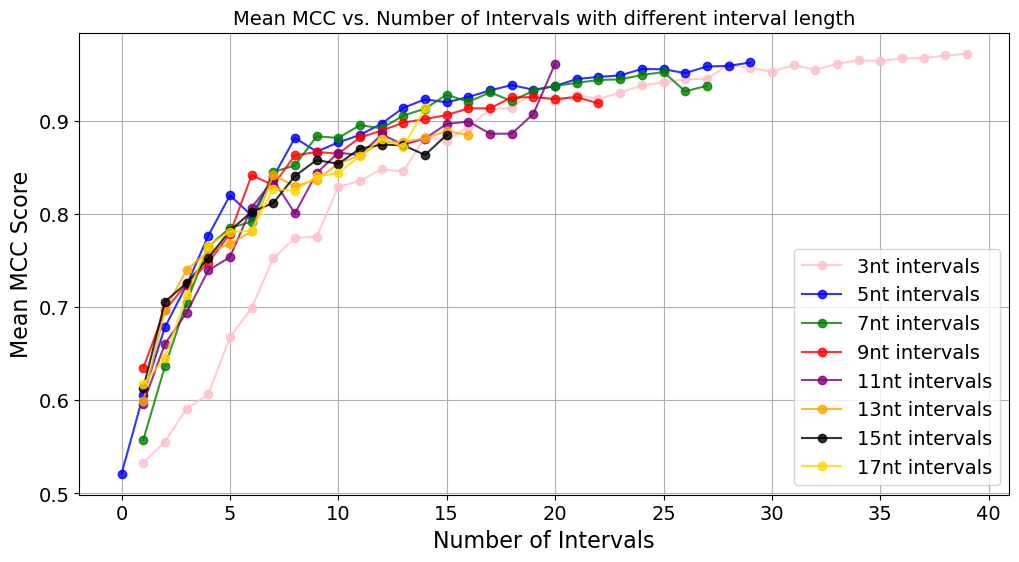

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the files (label -> path). The label here indicates the interval length used.
file_paths = {
    '3nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_1_50seq_400len_60bepernt_res_finding_intervals.tsv', 
    '5nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_2_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '7nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_3_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '9nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_4_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '11nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_5_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '13nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_6_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '15nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_7_50seq_400len_60bepernt_res_finding_intervals.tsv',
    '17nt': './data_for_vis/Supp_B4_MCCvsNumInterval/d1_8_50seq_400len_60bepernt_res_finding_intervals.tsv',
}


# Define colors for the datasets
colors = {
    '3nt': 'pink',
    '5nt': 'blue',
    '7nt': 'green',
    '9nt': 'red',
    '11nt': 'purple',
    '13nt': 'orange',
    '15nt': 'black',
    '17nt': 'gold',
}

plt.figure(figsize=(12, 6))

for label, file_path in file_paths.items():
    # Load the data
    data = pd.read_csv(file_path, sep='\t')
    
    # Ensure required columns exist
    expected_cols = ['SeqID', 'Number of Intervals', 'MCC']
    for col in expected_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in {file_path}")

    # First, for each (SeqID, Number of Intervals) pair, take the mean MCC
    data_mean = data.groupby(['SeqID','Number of Intervals'])['MCC'].mean().reset_index()

    # Now group by Number of Intervals (across all SeqIDs) to get mean & std
    stats = data_mean.groupby('Number of Intervals')['MCC'].agg(['mean','std']).reset_index()

    # Plot mean MCC vs. Number of Intervals
    plt.plot(
        stats['Number of Intervals'],
        stats['mean'],
        marker='o',
        linestyle='-',
        label=f'{label} intervals',
        color=colors[label], alpha=.8
    )

plt.yticks(fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.title('Mean MCC vs. Number of Intervals with different interval length', fontsize=14)
plt.xlabel('Number of Intervals', fontsize=16)
plt.ylabel('Mean MCC Score', fontsize=16)
plt.grid(True, which='both', axis='both')
plt.legend(loc='lower right', fontsize=14)

# Save the plot to a file
# output_file = './number_interval_seqlen400_8interval_len.svg'
# plt.savefig(output_file, format="svg")
# print(f"Plot saved as {output_file}")

plt.show()




### Supp Fig. B.6: Effect of balanced (symmetrical interval) vs unbalanced (skewed interval d1=1, d2=rest)

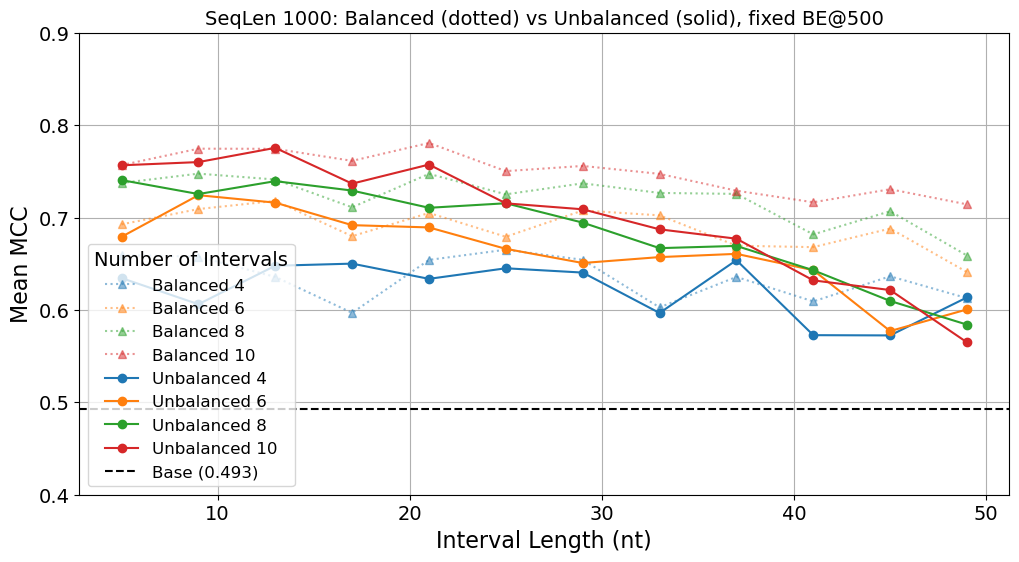

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define which interval counts to focus on in the plots
intervals_to_plot = [4, 6, 8, 10]

# Lists to hold processed data from the balanced and unbalanced datasets
combined_data_balanced = []
combined_data_unbalanced = []

# --- 1) Read BALANCED data ---

# BALANCED file paths
file_paths_balanced = {
    5: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_5_combined.tsv",
    9: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_9_combined.tsv",
    13: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_13_combined.tsv",
    17: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_17_combined.tsv",
    21: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_21_combined.tsv",
    25: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_25_combined.tsv",
    29: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_29_combined.tsv",
    33: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_33_combined.tsv",
    37: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_37_combined.tsv",
    41: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_41_combined.tsv",
    45: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_45_combined.tsv",
    49: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_balanced_bepernt_intlen_49_combined.tsv",
}
# Expected columns in the input data
expected_cols = ['SeqID', 'Number of Intervals', 'MCC']

# Read and process each file
for interval_length, file_path in file_paths_balanced.items():
    data = pd.read_csv(file_path, sep='\t')
    # Check for expected columns
    for col in expected_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in {file_path}")
    # Compute mean MCC per (SeqID, Number of Intervals)
    data_mean = data.groupby(['SeqID','Number of Intervals'])['MCC'].mean().reset_index()
    for row in data_mean.itertuples(index=False):
        combined_data_balanced.append([interval_length, row[1], row[2]])

# Convert collected data to DataFrame and filter for selected interval counts
df_balanced = pd.DataFrame(combined_data_balanced, columns=['Interval_Length', 'Number_of_Intervals', 'MCC'])
df_balanced_filtered = df_balanced[df_balanced['Number_of_Intervals'].isin(intervals_to_plot)]

# Group by interval length and number of intervals, average MCC
grouped_balanced = df_balanced_filtered.groupby(['Interval_Length','Number_of_Intervals'])['MCC'].mean().reset_index()

# Pivot table for plotting (interval lengths as rows, interval counts as columns)
pivot_balanced = grouped_balanced.pivot(index='Interval_Length', columns='Number_of_Intervals', values='MCC')


# --- 2) Read UNBALANCED data ---

# Same as above, but with unbalanced input files
file_paths_unbalanced = {
    5: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_5_combined.tsv",
    9: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_9_combined.tsv",
    13: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_13_combined.tsv",
    17: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_17_combined.tsv",
    21: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_21_combined.tsv",
    25: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_25_combined.tsv",
    29: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_29_combined.tsv",
    33: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_33_combined.tsv",
    37: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_37_combined.tsv",
    41: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_41_combined.tsv",
    45: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_45_combined.tsv",
    49: "./data_for_vis/Supp_B6_IntervalSymmetry/double_fixed_lenseq_1000_unbalanced_bepernt_intlen_49_combined.tsv",
}

# Read and process each unbalanced file
for interval_length, file_path in file_paths_unbalanced.items():
    data = pd.read_csv(file_path, sep='\t')
    for col in expected_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in {file_path}")
    data_mean = data.groupby(['SeqID','Number of Intervals'])['MCC'].mean().reset_index()
    for row in data_mean.itertuples(index=False):
        combined_data_unbalanced.append([interval_length, row[1], row[2]])

df_unbalanced = pd.DataFrame(combined_data_unbalanced, columns=['Interval_Length', 'Number_of_Intervals', 'MCC'])
df_unbalanced_filtered = df_unbalanced[df_unbalanced['Number_of_Intervals'].isin(intervals_to_plot)]
grouped_unbalanced = df_unbalanced_filtered.groupby(['Interval_Length','Number_of_Intervals'])['MCC'].mean().reset_index()
pivot_unbalanced = grouped_unbalanced.pivot(index='Interval_Length', columns='Number_of_Intervals', values='MCC')


# --- 3) Plot both datasets in the same figure ---

plt.figure(figsize=(12, 6))

# Plot the balanced data first (dotted lines with triangles and some transparency)
ax = pivot_balanced.plot(marker='^', ax=plt.gca(), alpha=0.5, linestyle=':')

# Relabel each line for clarity
for c, line in zip(pivot_balanced.columns, ax.get_lines()):
    line.set_label(f"Balanced {c}")

# Store the colors used for each line so we can reuse them for unbalanced
color_map = {col: line.get_color() for col, line in zip(pivot_balanced.columns, ax.get_lines())}

# Plot the unbalanced data using the same colors (solid lines with circles)
for col in pivot_unbalanced.columns:
    ax.plot(
        pivot_unbalanced.index,
        pivot_unbalanced[col],
        marker='o',
        color=color_map[col],
        alpha=1,
        label=f"Unbalanced {col}"
    )

# Optional: Add horizontal baseline for reference
plt.axhline(y=0.493, linestyle='--', label='Base (0.493)', color="black")

# Add labels, title, and grid
plt.title('SeqLen 1000: Balanced (dotted) vs Unbalanced (solid), fixed BE@500', fontsize=14)
plt.xlabel('Interval Length (nt)', fontsize=16)
plt.ylabel('Mean MCC', fontsize=16)
plt.grid(True, which='both', axis='both')

# Set legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, fontsize=12, title='Number of Intervals', title_fontsize=14)

# Set axis formatting
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.4, .9)

# Save the figure
# output_file = './finalfinal_balanced_vs_unbalanced.svg'
# plt.savefig(output_file, format="svg")
plt.show()
